In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 

In [ ]:
data=pd.read_csv('............')
data.head()
dataset=data.iloc[:,1:].values

In [ ]:
dataset[0]

array(["RT @theskindoctor13: Shaheen Bagh is still on.\n\nMosques are open.\n\nMuIIahs are saying Corona won't harm if you read qalma.\n\nTiktokiye are m…",
       'Fri Mar 20 16:04:27 +0000 2020', 'Uttar Pradesh, India', 0.0],
      dtype=object)

In [ ]:
dataset.shape

(648958, 4)

In [ ]:
data1=[]
y=[]

In [ ]:
for i in range (0,648958):
  if(dataset[i][0][0]=='R' and dataset[i][0][1]=='T'):
    continue
  else:
    data1.append(dataset[i][0])
    y.append(dataset[i][3])


In [ ]:
len(y)

177546

In [ ]:
for i in range(0,177546):
  if(y[i]>0.0000000):
    y[i]=1
  else:
    y[i]=0

In [ ]:
len(data1)

177546

In [ ]:
set(y)

{0, 1}

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


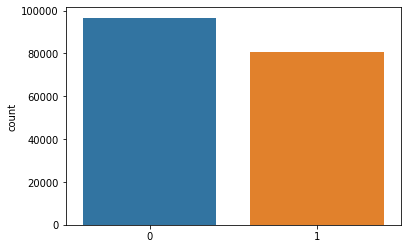

In [ ]:
sns.countplot(y)

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0,177546):
  review = re.sub('[^a-zA-Z]', ' ', data1[i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


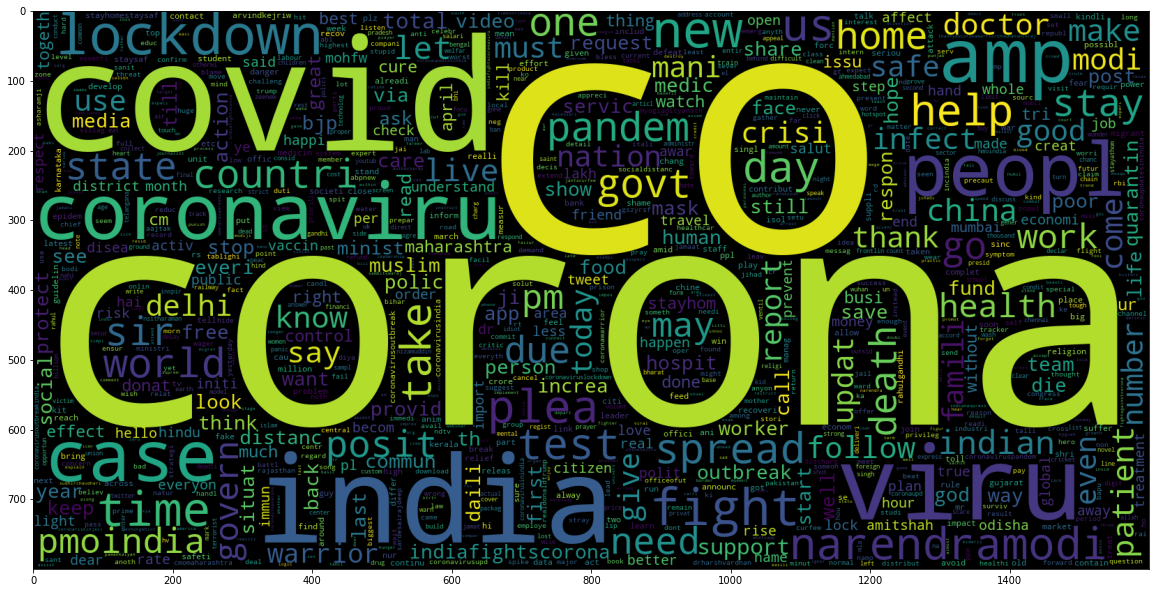

In [ ]:
data_neg = corpus[:]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 400)
x = cv.fit_transform(corpus).toarray()
#y = data.iloc[:, 0].values
 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1, random_state = 0)


In [ ]:
mined=pd.read_csv('............')
mined.head()


,Unnamed: 0,Text
0,0,#COVID19 death toll breaches 900-mark in #Odisha
1,1,as per this data by @MoHFW_INDIA #Kerala is a...
2,2,Not anymore.. #COVID19 #lockdown #Ontario #Do...
3,3,White House Aids release photos of President #...
4,4,@GovMikeDeWine @LtGovHusted Where is the Praye...


In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus1 = []
for i in range(0,6648):
  review = re.sub('[^a-zA-Z]', ' ', mined['Text'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus1.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 400)
x_test = cv.fit_transform(corpus1).toarray()

In [ ]:

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

In [ ]:
# importing pandas as pd  
import pandas as pd  
   
# list of name, degree, score 

# dictionary of lists  
dict = {'Text':mined['Text'], ' predicted sentiment': y_pred}  
     
df = pd.DataFrame(dict) 
  
# saving the dataframe 
df.to_csv('mined_Random_large.csv')

In [ ]:
from sklearn.linear_model import LogisticRegression 
classifier1=LogisticRegression(random_state=0)
classifier1.fit(x_train, y_train) 
y_pred1=classifier1.predict(x_test)

In [ ]:
# importing pandas as pd  
import pandas as pd  
   
# list of name, degree, score 

# dictionary of lists  
dict = {'Text':mined['Text'], ' predicted sentiment': y_pred1}  
     
df = pd.DataFrame(dict) 
  
# saving the dataframe 
df.to_csv('mined_Logistic_large.csv')

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier2=MultinomialNB()
classifier2.fit(x_train, y_train)
y_pred2=classifier2.predict(x_test)

In [ ]:
# importing pandas as pd  
import pandas as pd  
   
# list of name, degree, score 

# dictionary of lists  
dict = {'Text':mined['Text'], ' predicted sentiment': y_pred2}  
     
df = pd.DataFrame(dict) 
  
# saving the dataframe 
df.to_csv('mined_NaiveBayes_large.csv')

In [ ]:
from sklearn.svm import LinearSVC 
classifier3=LinearSVC(random_state=42)
classifier3.fit(x_train, y_train)
y_pred3=classifier3.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
# importing pandas as pd  
import pandas as pd  
   
# list of name, degree, score 

# dictionary of lists  
dict = {'Text':mined['Text'], ' predicted sentiment': y_pred3}  
     
df = pd.DataFrame(dict) 
  
# saving the dataframe 
df.to_csv('mined_LinearSVC_large.csv')

In [ ]:
from sklearn.linear_model import  SGDClassifier
classifier4 =  SGDClassifier(random_state=42)
classifier4.fit(x_train, y_train) 
y_pred4 = classifier4.predict(x_test)

In [ ]:
# importing pandas as pd  
import pandas as pd  
   
# list of name, degree, score 

# dictionary of lists  
dict = {'Text':mined['Text'], ' predicted sentiment': y_pred4}  
     
df = pd.DataFrame(dict) 
  
# saving the dataframe 
df.to_csv('mined_SGDC_large.csv')

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
classifier6=DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier6.fit(x_train, y_train)
y_pred6=classifier6.predict(x_test)

In [ ]:
# importing pandas as pd  
import pandas as pd  
   
# list of name, degree, score 

# dictionary of lists  
dict = {'Text':mined['Text'], ' predicted sentiment': y_pred6}  
     
df = pd.DataFrame(dict) 
  
# saving the dataframe 
df.to_csv('mined_Decision_large.csv')